<a href="https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day05_web_apis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web APIs
## Day05

### CS66: Introduction to Computer Science II | Fall 2024

Thursday, September 12th, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# References for this lecture

Requests module user's guide: [https://docs.python-requests.org/en/latest/](https://docs.python-requests.org/en/latest/)

Plotly graphing library: [https://plotly.com/python/](https://plotly.com/python/)

## Web API Terminology

__Authentication__: you might hear the term _API key_. This is something you would get for signing up for a login to an API. API keys are unique and identify you. They should be kept private (not uploaded to public Github profiles).

We are specifically working with APIs that don't require an _API Key_ in this class.



## Exploring data from the Dogs API

Last time, we got the following code working.
* if you don't yet have the `requests` module installed, see the notes from last time on how to do it (and ask for help if you run into any problems!)
* run this again and make sure you're able to print some data

In [ ]:
import requests

response = requests.get("https://dog.ceo/api/breeds/list/all")

data = response.json()
print(data)

{'message': {'affenpinscher': [], 'african': [], 'airedale': [], 'akita': [], 'appenzeller': [], 'australian': ['kelpie', 'shepherd'], 'bakharwal': ['indian'], 'basenji': [], 'beagle': [], 'bluetick': [], 'borzoi': [], 'bouvier': [], 'boxer': [], 'brabancon': [], 'briard': [], 'buhund': ['norwegian'], 'bulldog': ['boston', 'english', 'french'], 'bullterrier': ['staffordshire'], 'cattledog': ['australian'], 'cavapoo': [], 'chihuahua': [], 'chippiparai': ['indian'], 'chow': [], 'clumber': [], 'cockapoo': [], 'collie': ['border'], 'coonhound': [], 'corgi': ['cardigan'], 'cotondetulear': [], 'dachshund': [], 'dalmatian': [], 'dane': ['great'], 'danish': ['swedish'], 'deerhound': ['scottish'], 'dhole': [], 'dingo': [], 'doberman': [], 'elkhound': ['norwegian'], 'entlebucher': [], 'eskimo': [], 'finnish': ['lapphund'], 'frise': ['bichon'], 'gaddi': ['indian'], 'germanshepherd': [], 'greyhound': ['indian', 'italian'], 'groenendael': [], 'havanese': [], 'hound': ['afghan', 'basset', 'blood', '

In [ ]:
# here's a helper function to display the images in ipynb
from PIL import Image
def display_img(img_url):
    # query the image URL to display
    img = Image.open(requests.get(img_url, stream=True).raw)
    display(img)

In [ ]:
display_img("https://images.dog.ceo/breeds/australian-shepherd/sadie.jpg")

# Display a Random Dog:

{'message': 'https://images.dog.ceo/breeds/pointer-germanlonghair/hans2.jpg', 'status': 'success'}


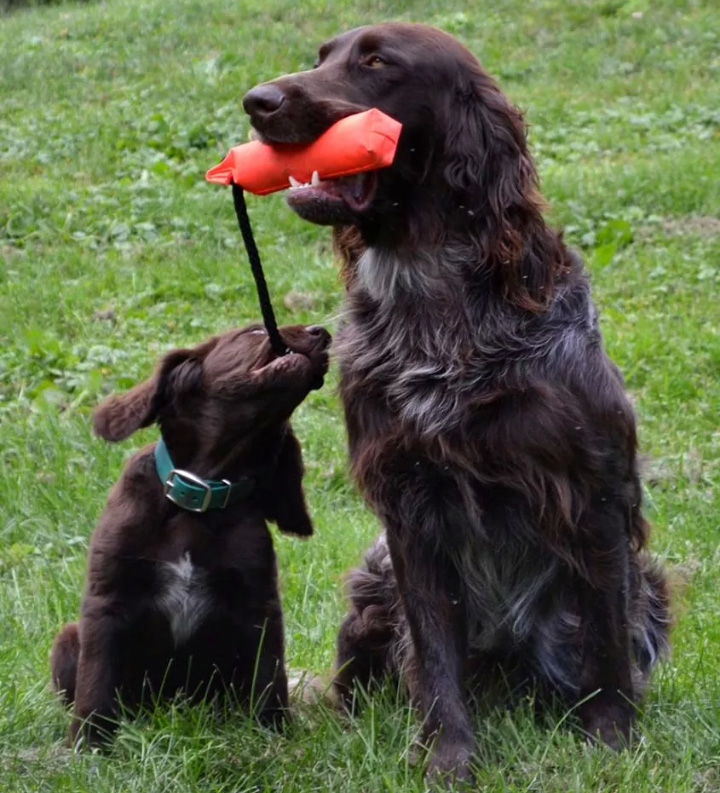

In [ ]:
from PIL import Image
import requests

response = requests.get("https://dog.ceo/api/breeds/image/random")

data = response.json()
print(data)

random_img_url = data['message']

display_img(random_img_url)

# Making Breed Specific Requests

Now we're going to try accessing some different data from the same Web API service. Notice that the code below is the same, but it uses a different web address - these different web addresses are called __endpoints__ of the API.

If you want to see only pictures of a certain breed, you can change the URL:

In [ ]:
response = requests.get("https://dog.ceo/api/breed/bulldog/images")
data = response.json()
print(data['message'])

['https://images.dog.ceo/breeds/bulldog-boston/20200710_175933.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/20200710_175944.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10380.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10452.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10596.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10604.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_1069.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10734.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10768.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10823.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_10846.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_11180.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_11417.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n02096585_11427.jpg', 'https://images.dog.ceo/breeds/bulldog-boston/n0

What if I only want to see Australian Shepherds?

['https://images.dog.ceo/breeds/australian-shepherd/forest.jpg', 'https://images.dog.ceo/breeds/australian-shepherd/leroy.jpg', 'https://images.dog.ceo/breeds/australian-shepherd/pepper.jpg', 'https://images.dog.ceo/breeds/australian-shepherd/pepper2.jpg', 'https://images.dog.ceo/breeds/australian-shepherd/sadie.jpg']


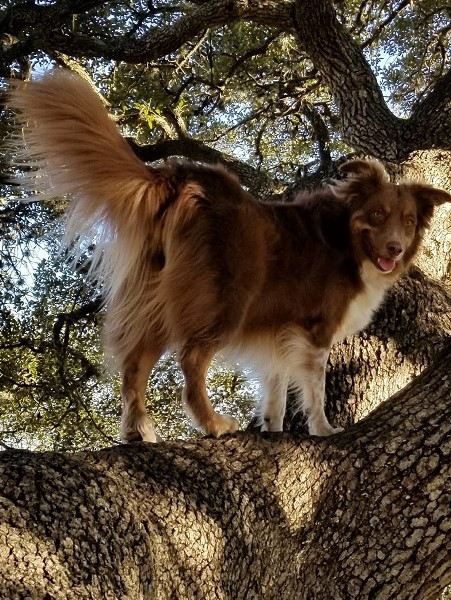

In [ ]:
# sub-breed requests
response = requests.get("https://dog.ceo/api/breed/australian/shepherd/images")
data = response.json()
print(data['message'])
display_img(data['message'][1])

## Group Activity #0
How many images of beagles are in the API?

{'message': 'https://images.dog.ceo/breeds/pointer-germanlonghair/hans2.jpg', 'status': 'success'}


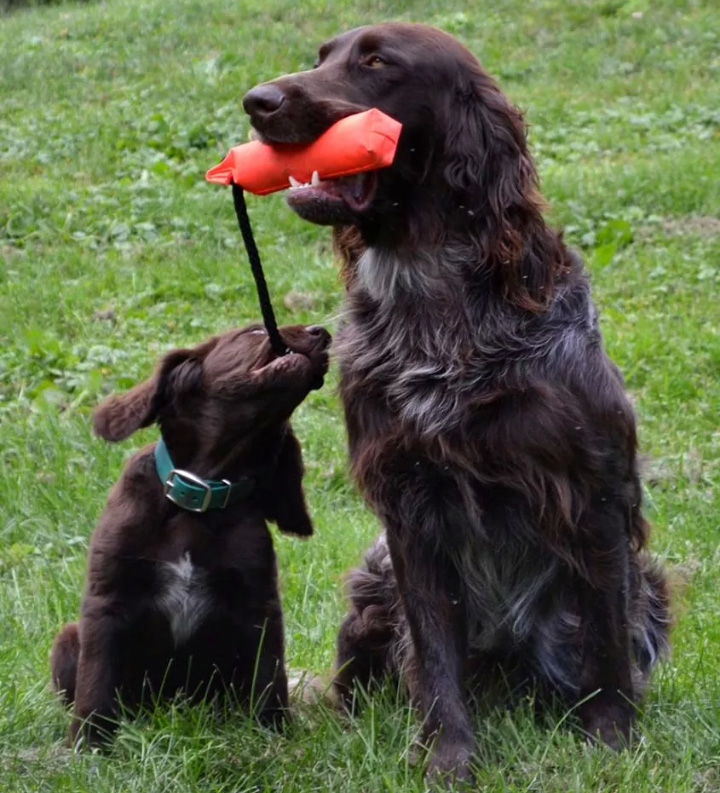

In [ ]:
from PIL import Image
import requests

response = requests.get("https://dog.ceo/api/breeds/image/random")

data = response.json()
print(data)

random_img_url = data['message']

display_img(random_img_url)

# New API

Today we're going to work with a different API that has a little bit more data to be able to play with.

Here is a respository that has a list of many public APIs that you can choose to play around with: [https://github.com/public-apis/public-apis](https://github.com/public-apis/public-apis)

Let's use this [COVID Tracking API](https://covidtracking.com/data/api/version-2): https://covidtracking.com/data/api/version-2

In [ ]:
import requests

response = requests.get("https://api.covidtracking.com/v2/states/ia/daily/simple.json")

data = response.json()
print(data)

## Group Activity Problem 1

Explore the `data` variable you got back. Remeber, we can use the `.keys()` function to take a look at what possible keys are in a dictionary. This might come in handy.

Answer the following questions about it:
* What is the format of this data?
* How many items did you get back?
* What do you think this data represents?

## Group Activity Problem 2

Write the line of code that would print the 50th item in the list.

## Group Activity Problem 3

Write the line of code that prints the state/province/region represented by the 50th item.

## Group Activity Problem 4

Write the line of code that prints the state/province/region represented by the 50th item along with the date and the number of active COVID cases.

## Group Activity Problem 5

Now try to print out the `'change_from_prior_day'` value for the first item in the list:

In [ ]:
import requests

response = requests.get("https://api.covidtracking.com/v2/us/daily.json")

data = response.json()
# your code here
print(data['data'][0]) #here's a starting place

41835


Discuss the format of this data - it's not the same as with the other endpoint. This is an example where it's not just a list of dictionaries like we've seen before. What is the type of the outer-most thing (data)? How many states are represented? Write the answers in your notes.

Note that you can find more endpoints here: [https://covidtracking.com/data/api/version-2](https://covidtracking.com/data/api/version-2)

## Group Activity Problem 6

Now, build a for loop that will loop through every day, and save the `change_from_prior_day` value into a list.

## Group Activity Problem 7

Now, choose one of the other APIs listed here that don't require an API key, and try it out yourself.

Find some end points, and experiment. Test your ability to decode the structure of the JSON that is returned.

https://github.com/public-apis/public-apis


# Next Class

Next class we'll introduce a plotting library `Plotly`, and will use data we pull from APIs to create some visualizations. We'll also talk about how to use `Dash` to build a dashboard for this data.

You should be working on:
- [Assignment #3](https://analytics.drake.edu/~moore/CS66-F24/Assignment3.html), due Tuesday (9/17) by 11:59 pm
> submit to CodePost